In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",names=['buying','maint','doors','persons','lug_boot','safety'],header=None)
data=data.reset_index(drop=True)
data.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,2,2,small,low,unacc
1,vhigh,2,2,small,med,unacc
2,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,low,unacc
4,vhigh,2,2,med,med,unacc


In [41]:
for i in data:
    print(data.loc[:,i].value_counts(),end="\n\n")

low      432
high     432
vhigh    432
med      432
Name: buying, dtype: int64

4        432
5more    432
2        432
3        432
Name: maint, dtype: int64

4       576
more    576
2       576
Name: doors, dtype: int64

small    576
big      576
med      576
Name: persons, dtype: int64

low     576
high    576
med     576
Name: lug_boot, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: safety, dtype: int64



In [28]:
data.shape

(1728, 6)

In [29]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [89]:
import csv

In [48]:
df = pd.read_csv("datasets_344_727_GroceryStoreDataSet.csv",header=None)
df.head()

,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [83]:
all_items = set()
with open("datasets_344_727_GroceryStoreDataSet.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        all_items.update(line)
#Now, we count if a particular item appears in the a particular row and update it in a list format.

counting = list()
with open("datasets_344_727_GroceryStoreDataSet.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row = {item:0 for item in all_items}
        row.update({item:1 for item in line})
        counting.append(row)
#Next, convert the list in to Pandas DataFrame so that wecan do pandas operations.

groceries = pd.DataFrame(counting)
groceries.head()

,MAGGI,COCK,JAM,COFFEE,MILK,BREAD,SUGER,BISCUIT,TEA,CORNFLAKES,BOURNVITA
0,0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,1,1,0,1,0,1,0
2,0,0,0,0,0,1,0,0,1,0,1
3,1,0,1,0,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,1,0,0


Text(0.5, 1.0, 'Item sales distribution')

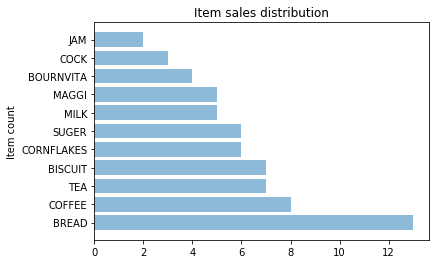

In [84]:
tot_item_count = sum(groceries.sum())

item_sum = groceries.sum().sort_values(ascending = False).reset_index().head(n=20)
item_sum.rename(columns={item_sum.columns[0]:'Item_name',item_sum.columns[1]:'Item_count'}, inplace=True)

item_sum['Item_percent'] = item_sum['Item_count']/tot_item_count
item_sum['Tot_percent'] = item_sum.Item_percent.cumsum()
item_sum.head(20) 


obj = (list(item_sum['Item_name'].head(n=20)))
y_pos = np.arange(len(obj))
performance = list(item_sum['Item_count'].head(n=20))
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, obj, rotation='horizontal')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [85]:
y = list(groceries.columns)
for s in y:
    groceries.loc[(groceries[s] == 1),s]=s
#Removing Zero's
lol = groceries.values.tolist() 
for a in lol:
    while (0 in a):
        a.remove(0)

        
with open("newdf.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(lol)

[(13, 'BREAD'), (8, 'COFFEE'), (7, 'TEA'), (7, 'BISCUIT'), (6, 'SUGER'), (6, 'CORNFLAKES'), (5, 'MILK'), (5, 'MAGGI'), (4, 'BOURNVITA'), (3, 'COCK'), (2, 'JAM')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Count   11 non-null     int64 
 1   Word    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
None
C2:  [('MILK', 'SUGER'), ('BREAD', 'MILK')]
length :  55

Ct Length :  36

L Length :  36

[(4, ('MAGGI', 'TEA')), (4, ('COFFEE', 'SUGER')), (4, ('COFFEE', 'CORNFLAKES')), (4, ('BREAD', 'TEA')), (4, ('BREAD', 'SUGER')), (4, ('BREAD', 'MILK')), (4, ('BISCUIT', 'BREAD')), (3, ('COCK', 'COFFEE')), (3, ('BREAD', 'MAGGI')), (3, ('BREAD', 'COFFEE')), (3, ('BOURNVITA', 'BREAD')), (3, ('BISCUIT', 'CORNFLAKES')), (2, ('JAM', 'MAGGI')), (2, ('CORNFLAKES', 'TEA')), (2, ('CORNFLAKES', 'MILK')), (2, ('COCK', 'CORNFLAKES')), (2, ('BREAD', '

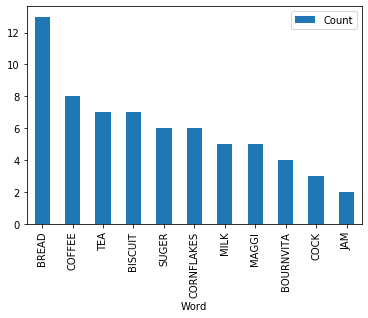

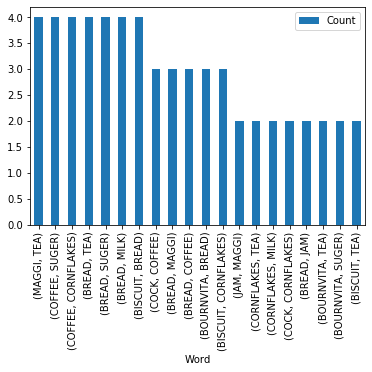

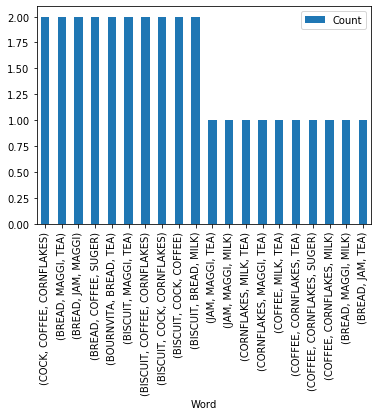

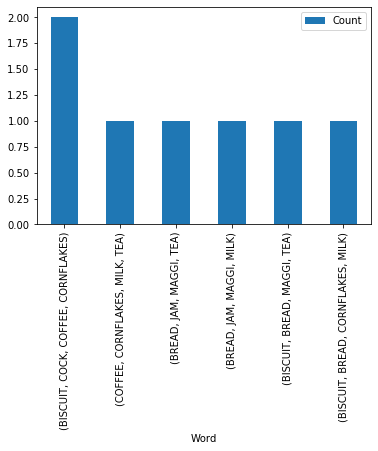

In [88]:
import csv
import itertools

Groceries = open('newdf.csv', 'r')

min_support = 0
Rules = "prunedRules.txt"
freqItemsets = "prunedFItems.txt"
#Mininum Confidence
min_confidence = 3

# Finding all Frequent 1-Item sets
def OneItemSets():
    #Get all 1-itemsets in the list items and their counts in the dictionary counts
    DataCaptured = csv.reader(Groceries, delimiter=',')
    data = list(DataCaptured)
#     print(data)
    for e in data:
        e = sorted(e)
    count = {}
    for items in data:
        for item in items:
            if item not in count:
                count[(item)] = 1
            else:
                count[(item)] = count[(item)] + 1

    count2 = {k: v for k, v in count.items() if v >= min_support*9835}
    return count2, data

def generateCk(Lk_1, flag, data):
    Ck = []
    if flag == 1:
        flag = 0
        for item1 in Lk_1:
            for item2 in Lk_1:
                if item2 > item1:
                    Ck.append((item1, item2))
        print("C2: ", Ck[1:3])
        print("length : ", len(Ck))
        print()

    else:
        for item in Lk_1:
            k = len(item)
        for item1 in Lk_1:
            for item2 in Lk_1:
                if (item1[:-1] == item2[:-1]) and (item1[-1] != item2[-1]):
                    if item1[-1] > item2[-1]:
                        Ck.append(item2 + (item1[-1],))
                    else:
                        Ck.append(item1 + (item2[-1],))
        print("C" + str(k+1) + ": ", Ck[1:3])
        print("Length : ", len(Ck))
        print()
    L = generateLk(set(Ck), data)
    return L, flag

#If item in Ck belongs to a transaction, it makes it into list Ct Then Ct is thresholded to form L
# For K frequent Itemsets
def generateLk(Ck, data):
    
    count = {}
    for itemset in Ck:
        #print(itemset)
        for transaction in data:
            if all(e in transaction for e in itemset):
                if itemset not in count:
                    count[itemset] = 1
                else:
                    count[itemset] = count[itemset] + 1

    print("Ct Length : ", len(count))
    print()

    count2 = {k: v for k, v in count.items() if v >= min_support*9835}
    print("L Length : ", len(count2))
    print()
    return count2

#  Generates association rules from the frequent itemsets
def rulegenerator(fitems):
    counter = 0
    for itemset in fitems.keys():
        if isinstance(itemset, str):
            continue
        length = len(itemset)

        union_support = fitems[tuple(itemset)]
        for i in range(1, length):

            lefts = map(list, itertools.combinations(itemset, i))
            for left in lefts:
                if len(left) == 1:
                    if ''.join(left) in fitems:
                        leftcount = fitems[''.join(left)]
                        conf = union_support / leftcount
                else:
                    if tuple(left) in fitems:
                        leftcount = fitemsmsmsmsmsms[tuple(left)]
                        conf = union_support / leftcount
                if conf >= min_confidence:
                    fo = open(Rules, "a+")
                    right = list(itemset[:])
                    for e in left:
                        right.remove(e)
                    fo.write(str(left) + ' (' + str(leftcount) + ')' + ' -> ' + str(right) + ' (' + str(fitems[''.join(right)]) + ')' + ' [' + str(conf) + ']' + '\n')
                    print(str(left) + ' -> ' + str(right) + ' (' + str(conf) + ')')
                    counter = counter + 1
                    #Greater than 1???
                    fo.close()
    print(counter, "rules generated")
def plotitemfreq(L):
    aux = [(L[key], key) for key in L]
    aux.sort()
    aux.reverse()
    z = aux[0:20]
    print(z)
    df = pd.DataFrame(z, columns = ['Count', 'Word'])
    df['Count']=pd.to_numeric(df['Count'])
    print(df.info())
    df.plot.bar(x='Word', y='Count')

def apriori():
    L, data = OneItemSets()
    
    flag = 1
    FreqItems = dict(L)
    while(len(L) != 0):
        fo = open(freqItemsets, "a+")
        for k, v in L.items():
           
            fo.write(str(k) + ' >>> ' + str(v) + '\n\n')
        fo.close()
        plotitemfreq(L)

        L, flag = generateCk(L, flag, data)
        FreqItems.update(L)
    rulegenerator(FreqItems)


if __name__ == '__main__':
    apriori()

In [6]:
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5
0,P1,11,12,10,8,13,12
1,P2,7,6,3,2,7,1
2,P3,7,11,8,9,10,8
3,P4,12,8,13,5,9,6
4,P5,8,5,13,11,6,7


In [7]:
ex11 = df.copy()

In [10]:
ex11=ex11.loc[:,['W1','W2','W3','W4','W5']]

In [11]:
mini = 1
maxi = 5

X_std = (ex11-ex11.min(axis=0))/(ex11.max(axis=0)-ex11.min(axis=0))
X_scaled = X_std*(maxi-mini)+mini

In [14]:
df.loc[:,['W1','W2','W3','W4','W5']]= X_scaled

In [15]:
df

,Product_Code,W0,W1,W2,W3,W4,W5
0,P1,11,1.905660,1.714286,1.542373,1.852459,1.923077
1,P2,7,1.452830,1.214286,1.135593,1.459016,1.076923
2,P3,7,1.830189,1.571429,1.610169,1.655738,1.615385
3,P4,12,1.603774,1.928571,1.338983,1.590164,1.461538
4,P5,8,1.377358,1.928571,1.745763,1.393443,1.538462
...,...,...,...,...,...,...,...
806,P815,0,1.000000,1.071429,1.000000,1.000000,1.153846
807,P816,0,1.075472,1.000000,1.000000,1.065574,1.153846
808,P817,1,1.000000,1.000000,1.000000,1.065574,1.076923
809,P818,0,1.000000,1.000000,1.067797,1.000000,1.000000


In [16]:
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5
0,P1,11,12,10,8,13,12
1,P2,7,6,3,2,7,1
2,P3,7,11,8,9,10,8
3,P4,12,8,13,5,9,6
4,P5,8,5,13,11,6,7


In [17]:
ex11_Z_SCORE = df.copy()

ex11_Z_SCORE = ex11_Z_SCORE.loc[:,['W1','W2','W3','W4','W5']]
ex11_Z_SCORE = (ex11 - ex11.mean())/ex11.std()
ex11_Z_SCORE

,W1,W2,W3,W4,W5
0,0.228459,0.046788,-0.126732,0.261566,0.197604
1,-0.249067,-0.489813,-0.569429,-0.196598,-0.660217
2,0.148871,-0.106526,-0.052949,0.032484,-0.114331
3,-0.089892,0.276760,-0.348080,-0.043877,-0.270299
4,-0.328655,0.276760,0.094617,-0.272958,-0.192315
...,...,...,...,...,...
806,-0.726593,-0.643127,-0.716994,-0.731122,-0.582233
807,-0.647005,-0.719785,-0.716994,-0.654761,-0.582233
808,-0.726593,-0.719785,-0.716994,-0.654761,-0.660217
809,-0.726593,-0.719785,-0.643211,-0.731122,-0.738201


In [18]:
df.loc[:,['W1','W2','W3','W4','W5']]= ex11_Z_SCORE

In [19]:
df

,Product_Code,W0,W1,W2,W3,W4,W5
0,P1,11,0.228459,0.046788,-0.126732,0.261566,0.197604
1,P2,7,-0.249067,-0.489813,-0.569429,-0.196598,-0.660217
2,P3,7,0.148871,-0.106526,-0.052949,0.032484,-0.114331
3,P4,12,-0.089892,0.276760,-0.348080,-0.043877,-0.270299
4,P5,8,-0.328655,0.276760,0.094617,-0.272958,-0.192315
...,...,...,...,...,...,...,...
806,P815,0,-0.726593,-0.643127,-0.716994,-0.731122,-0.582233
807,P816,0,-0.647005,-0.719785,-0.716994,-0.654761,-0.582233
808,P817,1,-0.726593,-0.719785,-0.716994,-0.654761,-0.660217
809,P818,0,-0.726593,-0.719785,-0.643211,-0.731122,-0.738201
